# Capstone Project - The Battle of The Neighborhoods

Created with Skills Network Labs

### This notebook contains data for Week 2 for the Capstone Project

**You will find the following content within this notebook:**

1. Methodology and Exploratory Data Analysis
2. Inferences and Discussion

# The Data Science Workflow

**Data Requirements**

New York City is divided into five boroughs. The data regarding the boroughs needs to be researched and a suitable source must be identified. If the data is not in usable form, data wrangling and data cleansing must be performed.

The cleansed data will be used simultaneously with Foursquare data. Foursquare location data will be leveraged to explore and compare the boroughs of New York City, identifying high traffic areas.

**The Data Science Workflow includes the following:**

  * **Outline the intitial data that is required:**
    * Borough data for New York City including names, location data, and any other necessary details.

  * **Obtain the Data:**
    * Research and find suitable sources for the borough data for New York City.
    * Access and explore the data to determine if it can be manipulated for our purposes.

  * **Initial Data Wrangling and Cleansing:**
    * Clean the data and convert to a usable form as a dataframe.

  * **Data Analysis and Location Data:**
    * Foursquare location data will be leveraged to explore and compare the boroughs of New York City.
    * Data manipulation and analysis to derive subsets of data.
    * Identifying the high traffic areas using data visualization.

  * **Visualization:**
    * Analysis and plotting visualizations.
    * Data visualization using various mapping libraries.

  * **Discussion and Conclusions:**
    * Recommendations and results based on the data analysis.
    * Discussion of any limitations and how the results can be used.

**Import the Required Libraries**

In [9]:
# Import libraries
import numpy as np
import json # library to handle JSON files
import pandas as pd

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# Import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.2 MB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.21.0-py_0

The following packages will be UPDATED:

  openssl                                 1.1.1f-h516909a_0 --> 1.1.1g-h516909a_0



openssl-1.1.1g       | 2.1 MB    | ############

# Data Research and Preparation

### Import the New York City Borough Data

New York City is divided into five boroughs. This data is necessary to select the most suitable of these areas for the new location.

Link to where the dataset was found: https://data.cityofnewyork.us/City-Government/New-York-City-Population-by-Borough-1950-2040/xywu-7bv9/data

In [10]:
import os
print(os.getcwd())

/resources


In [11]:
os.listdir(os.getcwd())

['Untitled.ipynb',
 'Untitled1.ipynb',
 '.ipynb_checkpoints',
 'data',
 'My_Notebook.ipynb',
 'labs',
 'NYC_Data.csv',
 'Capstone Project - Week 2.ipynb']

In [12]:
# Download the dataset and read it into a pandas dataframe.

NYC = pd.read_csv('NYC_Data.csv')
NYC

,Age Group,Borough,1950,1950 - Boro share of NYC total,1960,1960 - Boro share of NYC total,1970,1970 - Boro share of NYC total,1980,1980 - Boro share of NYC total,...,2010,2010 - Boro share of NYC total,2020,2020 - Boro share of NYC total,2030,2030 - Boro share of NYC total,2040,2040 - Boro share of NYC total,Latitude,Longitude
0,Total Population,NYC Total,7891957,100.00,7781984,100.00,7894862,100.00,7071639,100.00,...,8242624,100.00,8550971,100.00,8821027,100.00,9025145,100.00,40.712728,-74.006015
1,Total Population,Bronx,1451277,18.39,1424815,18.31,1471701,18.64,1168972,16.53,...,1385108,16.80,1446788,16.92,1518998,17.22,1579245,17.50,40.846651,-73.878594
2,Total Population,Brooklyn,2738175,34.70,2627319,33.76,2602012,32.96,2230936,31.55,...,2552911,30.97,2648452,30.97,2754009,31.22,2840525,31.47,40.650104,-73.949582
3,Total Population,Manhattan,1960101,24.84,1698281,21.82,1539233,19.50,1428285,20.20,...,1585873,19.24,1638281,19.16,1676720,19.01,1691617,18.74,40.789624,-73.959894
4,Total Population,Queens,1550849,19.65,1809578,23.25,1986473,25.16,1891325,26.75,...,2250002,27.30,2330295,27.25,2373551,26.91,2412649,26.73,40.749824,-73.797634
5,Total Population,Staten Island,191555,2.43,221991,2.85,295443,3.74,352121,4.98,...,468730,5.69,487155,5.70,497749,5.64,501109,5.55,40.583456,-74.149605


**Clean up the dataset to remove unnecessary columns**

In [13]:
# Clean up the dataset to remove unnecessary columns.
# Some of the columns are for mapping software - not required here.

NYC.drop(['1950','1950 - Boro share of NYC total','1960','1960 - Boro share of NYC total','1970', '1970 - Boro share of NYC total' , '1980' , '1980 - Boro share of NYC total' ,
         '1990' , '1990 - Boro share of NYC total' , '2000' , '2000 - Boro share of NYC total' , '2010' , '2010 - Boro share of NYC total' , '2030' ,
         '2030 - Boro share of NYC total' , '2040' , '2040 - Boro share of NYC total'], axis=1, inplace=True)
NYC

,Age Group,Borough,2020,2020 - Boro share of NYC total,Latitude,Longitude
0,Total Population,NYC Total,8550971,100.00,40.712728,-74.006015
1,Total Population,Bronx,1446788,16.92,40.846651,-73.878594
2,Total Population,Brooklyn,2648452,30.97,40.650104,-73.949582
3,Total Population,Manhattan,1638281,19.16,40.789624,-73.959894
4,Total Population,Queens,2330295,27.25,40.749824,-73.797634
5,Total Population,Staten Island,487155,5.70,40.583456,-74.149605


In [14]:
# Check the shape of the dataframe
NYC.shape

(6, 6)

**Use the geopy library to get the latitude and longitude values of New York City and the five boroughs**

In [15]:
# Retrieve the Latitude and Longitude for New York City
from geopy.geocoders import Nominatim 

address = 'New York City'

# Define the user_agent as NYC_explorer
geolocator = Nominatim(user_agent="NYC_explorer")

location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geographical coordinates of New York, New York are {}, {}.'.format(latitude, longitude))

The geographical coordinates of New York, New York are 40.7127281, -74.0060152.


## Retrieve the Latitude and Longitude for Bronx
from geopy.geocoders import Nominatim 

address = 'Bronx'

# Define the user_agent as NYC_explorer
geolocator = Nominatim(user_agent="NYC_explorer")

location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geographical coordinates of Bronx, New York are {}, {}.'.format(latitude, longitude))

In [16]:
# Retrieve the Latitude and Longitude for Brooklyn
from geopy.geocoders import Nominatim 

address = 'Brooklyn'

# Define the user_agent as NYC_explorer
geolocator = Nominatim(user_agent="NYC_explorer")

location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geographical coordinates of Brooklyn, New York are {}, {}.'.format(latitude, longitude))

The geographical coordinates of Brooklyn, New York are 40.6501038, -73.9495823.


In [17]:
# Retrieve the Latitude and Longitude for Manhattan
from geopy.geocoders import Nominatim 

address = 'Manhattan'

# Define the user_agent as NYC_explorer
geolocator = Nominatim(user_agent="NYC_explorer")

location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geographical coordinates of Manhattan, New York are {}, {}.'.format(latitude, longitude))

The geographical coordinates of Manhattan, New York are 40.7896239, -73.9598939.


In [18]:
# Retrieve the Latitude and Longitude for Queens
from geopy.geocoders import Nominatim 

address = 'Queens'

# Define the user_agent as NYC_explorer
geolocator = Nominatim(user_agent="NYC_explorer")

location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geographical coordinates of Queens, New York are {}, {}.'.format(latitude, longitude))

The geographical coordinates of Queens, New York are 40.7498243, -73.7976337.


In [19]:
# Retrieve the Latitude and Longitude for Staten Island
from geopy.geocoders import Nominatim 

address = 'Staten Island'

# Define the user_agent as NYC_explorer
geolocator = Nominatim(user_agent="NYC_explorer")

location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geographical coordinates of Staten Island, New York are {}, {}.'.format(latitude, longitude))

The geographical coordinates of Staten Island, New York are 40.5834557, -74.1496048.


## Create a map of New York City with Boroughs superimposed

In [20]:
# create map of NYC using the above latitude and longitude values
map_NYC = folium.Map(location=[latitude, longitude], zoom_start=12)


# add markers to map
for lat, lng, label in zip(NYC['Latitude'], NYC['Longitude'], NYC['Borough']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=50,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_NYC)  
    
map_NYC

## Use the Foursquare API to explore the Boroughs of NYC

Define Foursquare Credentials and Version

In [21]:
CLIENT_ID = 'HRB5MK01OUMEWB1GSGX55XPBBCETVVPK0A5VSGX2NA4KRLQV' # your Foursquare ID
CLIENT_SECRET = '0Q4DA1NVCHKDRYUQ0KTYGBQPNLU1BJMCC25CYPVWEGXOIP5Q' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: HRB5MK01OUMEWB1GSGX55XPBBCETVVPK0A5VSGX2NA4KRLQV
CLIENT_SECRET:0Q4DA1NVCHKDRYUQ0KTYGBQPNLU1BJMCC25CYPVWEGXOIP5Q


## Exploratory Data Analysis

#### Explore the first borough in our dataframe to become familiar with the data

In [60]:
# Explore the first Neighborhood in our dataframe.

NYC.loc[1, 'Borough']

'   Bronx'

#### The first borough is defined as Bronx

In [23]:
# Get the Neighborhood's latitude and longitude values.

neighborhood_latitude = NYC.loc[1, 'Latitude'] # Neighborhood latitude value
neighborhood_longitude = NYC.loc[1, 'Longitude'] # Neighborhood longitude value

neighborhood_name = NYC.loc[1, 'Borough'] # Neighborhood name

print('Latitude and longitude values of the neighborhood {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of the neighborhood    Bronx are 40.8466508, -73.87859370000001.


## Get the top 100 venues that are in the neighborhood with a radius of 500 meters

In [24]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # displays the URL

'https://api.foursquare.com/v2/venues/explore?&client_id=HRB5MK01OUMEWB1GSGX55XPBBCETVVPK0A5VSGX2NA4KRLQV&client_secret=0Q4DA1NVCHKDRYUQ0KTYGBQPNLU1BJMCC25CYPVWEGXOIP5Q&v=20180605&ll=40.8466508,-73.87859370000001&radius=500&limit=100'

In [25]:
# Send the GET request and examine the resutls

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ea827120be7b4001bf4fcb7'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Bronx Park',
  'headerFullLocation': 'Bronx Park, Bronx',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 26,
  'suggestedBounds': {'ne': {'lat': 40.8511508045, 'lng': -73.87265606159048},
   'sw': {'lat': 40.8421507955, 'lng': -73.88453133840954}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4abcfe4bf964a520fa8720e3',
       'name': 'JungleWorld',
       'location': {'address': 'The Bronx Zoo',
        'crossStreet': 'Asia Plaza',
        'lat': 40.84522652894162,
        'lng': -73.8771813890588,
        'labeledLatLngs': [{'label': 'display',
    

### Define the function that extracts the category of the venue

In [26]:
# define a function that extracts the category of the venue

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### Structure the json file into a pandas dataframe

In [27]:
# clean the json and structure it into a pandas dataframe.

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(20)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,name,categories,lat,lng
0,JungleWorld,Zoo,40.845227,-73.877181
1,African Lions,Zoo Exhibit,40.847058,-73.878024
2,Congo Gorilla Forest,Zoo,40.847774,-73.881604
3,Grizzly Corner,Zoo Exhibit,40.849023,-73.877739
4,Himalayan Highlands,Scenic Lookout,40.848404,-73.876649
5,Giraffe House,Zoo Exhibit,40.847875,-73.880127
6,Wild Asia Monorail,Zoo,40.845285,-73.875788
7,Bug Carousel,Theme Park,40.849461,-73.879659
8,World of Reptiles,Zoo Exhibit,40.849287,-73.878856
9,Zoo Store,Souvenir Shop,40.850120,-73.880204


In [28]:
# Check how many venues there are in the Bronx within a radius of 500 meters

print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

26 venues were returned by Foursquare.


### Create a nearby venues function for all the boroughs of NYC

In [29]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Create a new dataframe called for the venues of NYC called NYC_venues

In [30]:
# Create a new dataframe called NYC_venues.

NYC_venues = getNearbyVenues(names=NYC['Borough'],
                                   latitudes=NYC['Latitude'],
                                   longitudes=NYC['Longitude']
                                  )

NYC Total
   Bronx
   Brooklyn
   Manhattan
   Queens
   Staten Island


In [38]:
print(NYC_venues.shape)
NYC_venues.head(178)

(178, 7)


,Borough,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,NYC Total,40.712728,-74.006015,The Bar Room at Temple Court,40.711448,-74.006802,Hotel Bar
1,NYC Total,40.712728,-74.006015,"The Beekman, A Thompson Hotel",40.711173,-74.006702,Hotel
2,NYC Total,40.712728,-74.006015,Alba Dry Cleaner & Tailor,40.711434,-74.006272,Laundry Service
3,NYC Total,40.712728,-74.006015,City Hall Park,40.712415,-74.006724,Park
4,NYC Total,40.712728,-74.006015,Augustine,40.711310,-74.006660,French Restaurant
...,...,...,...,...,...,...,...
173,Staten Island,40.583456,-74.149605,Greenbelt Nature Center,40.586616,-74.146917,Trail
174,Staten Island,40.583456,-74.149605,SUBWAY,40.587029,-74.152155,Sandwich Place
175,Staten Island,40.583456,-74.149605,Bowling,40.583876,-74.149626,Bowling Alley
176,Staten Island,40.583456,-74.149605,Port Richmond Yatch Club,40.584791,-74.153294,Harbor / Marina


### Check how many venues were returned for each Borough

Note: There is a 100 venue limit set by the free Foursquare account, thus limiting this search.

In [39]:
NYC_venues.groupby('Borough').count()

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Borough,,,,,,
Bronx,26,26,26,26,26,26
Brooklyn,25,25,25,25,25,25
Manhattan,30,30,30,30,30,30
Queens,5,5,5,5,5,5
Staten Island,5,5,5,5,5,5
NYC Total,87,87,87,87,87,87


### Calculate how many unique venue categories there are

In [40]:
print('There are {} unique venue categories.'.format(len(NYC_venues['Venue Category'].unique())))

There are 96 unique venue categories.


### Analyze each of the boroughs

In [41]:
# Analyze each of the Neighborhoods from the results

# one hot encoding
NYC_onehot = pd.get_dummies(NYC_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
NYC_onehot['Neighborhood'] = NYC_venues['Borough'] 

# move neighborhood column to the first column
fixed_columns = [NYC_onehot.columns[-1]] + list(NYC_onehot.columns[:-1])
NYC_onehot = NYC_onehot[fixed_columns]

NYC_onehot

,Neighborhood,American Restaurant,Antique Shop,Asian Restaurant,Athletics & Sports,Baby Store,Bagel Shop,Bakery,Bank,Bar,...,Theme Park,Theme Park Ride / Attraction,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant,Wine Shop,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,NYC Total,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NYC Total,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NYC Total,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NYC Total,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NYC Total,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,Staten Island,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
174,Staten Island,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
175,Staten Island,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
176,Staten Island,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# The shape of the dataframe is
NYC_onehot.shape

(178, 97)

### Group rows by borough and take the mean of the frequency of occurrence for each category

In [43]:
NYC_grouped = NYC_onehot.groupby('Neighborhood').mean().reset_index()
NYC_grouped

,Neighborhood,American Restaurant,Antique Shop,Asian Restaurant,Athletics & Sports,Baby Store,Bagel Shop,Bakery,Bank,Bar,...,Theme Park,Theme Park Ride / Attraction,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant,Wine Shop,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Bronx,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.038462,0.038462,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.115385,0.269231
1,Brooklyn,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.04,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000
2,Manhattan,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000
3,Queens,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Staten Island,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,0.4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,NYC Total,0.022989,0.011494,0.011494,0.000000,0.011494,0.011494,0.011494,0.00,0.011494,...,0.000000,0.000000,0.011494,0.0,0.011494,0.022989,0.000000,0.022989,0.000000,0.000000


In [45]:
# The shape of the grouped data is
NYC_grouped.shape

(6, 97)

### Print each borough with it's top 10 most common venues

In [46]:
# Each  neighborhood with top 10 most common venues

num_top_venues = 10

for hood in NYC_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = NYC_grouped[NYC_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----   Bronx----
                  venue  freq
0           Zoo Exhibit  0.27
1                  Park  0.15
2                   Zoo  0.12
3            Theme Park  0.04
4        Scenic Lookout  0.04
5         Souvenir Shop  0.04
6  Fast Food Restaurant  0.04
7   Fried Chicken Joint  0.04
8               Theater  0.04
9       Laundry Service  0.04


----   Brooklyn----
                    venue  freq
0    Caribbean Restaurant  0.24
1               Juice Bar  0.12
2           Grocery Store  0.08
3            Liquor Store  0.08
4                  Market  0.04
5                Pharmacy  0.04
6              Donut Shop  0.04
7       Mobile Phone Shop  0.04
8       Convenience Store  0.04
9  Furniture / Home Store  0.04


----   Manhattan----
                      venue  freq
0                      Park  0.23
1            Baseball Field  0.20
2                Playground  0.17
3  Bike Rental / Bike Share  0.03
4              Tennis Court  0.03
5               Bus Station  0.03
6                 

### Put that data into a pandas dataframe and sort the venues in descending order

In [47]:
# First sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### The top 10 venue categories for each borough

This will be a very important results table which can provide quick 'at a glance' information for each borough. This table can be referenced even after conclusions are drawn to find additional meaningful insights about the top categories of business for each borough. Although it does not display actual numbers, it is a great reference as it is easy to understand and present to management. 

In [51]:
# create the new dataframe and display the top 10 venues for each neighborhood

num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
# create a new dataframe
NYC_venues_sorted = pd.DataFrame(columns=columns)
NYC_venues_sorted['Neighborhood'] = NYC_grouped['Neighborhood']

for ind in np.arange(NYC_grouped.shape[0]):
    NYC_venues_sorted.iloc[ind, 1:] = return_most_common_venues(NYC_grouped.iloc[ind, :], num_top_venues)

NYC_venues_sorted.head(20)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bronx,Zoo Exhibit,Park,Zoo,Souvenir Shop,Garden,Gas Station,General Travel,Fast Food Restaurant,Laundry Service,Pizza Place
1,Brooklyn,Caribbean Restaurant,Juice Bar,Grocery Store,Liquor Store,Playground,Gym / Fitness Center,Donut Shop,Market,Convenience Store,Mobile Phone Shop
2,Manhattan,Park,Baseball Field,Playground,Tennis Court,Metro Station,Bus Stop,Bus Station,Breakfast Spot,Dog Run,Bike Rental / Bike Share
3,Queens,Locksmith,Bus Station,Korean Restaurant,Bike Trail,Sports Club,Zoo Exhibit,Coffee Shop,Comic Shop,Convenience Store,Coworking Space
4,Staten Island,Trail,Harbor / Marina,Sandwich Place,Bowling Alley,Zoo Exhibit,Dog Run,Cocktail Bar,Coffee Shop,Comic Shop,Convenience Store
5,NYC Total,Hotel,French Restaurant,Coffee Shop,Cocktail Bar,Café,Bubble Tea Shop,Gym / Fitness Center,Falafel Restaurant,Park,Pizza Place


In [52]:
# The shape of the sorted data is
NYC_venues_sorted.shape

(6, 11)

### The business types criteria named 'Fast Food Restaurant', 'Pizza Place', and 'Park'

#### Here we will look at the frequency of occurrence for these categories in all of the NYC boroughs, isolating the categorical venues

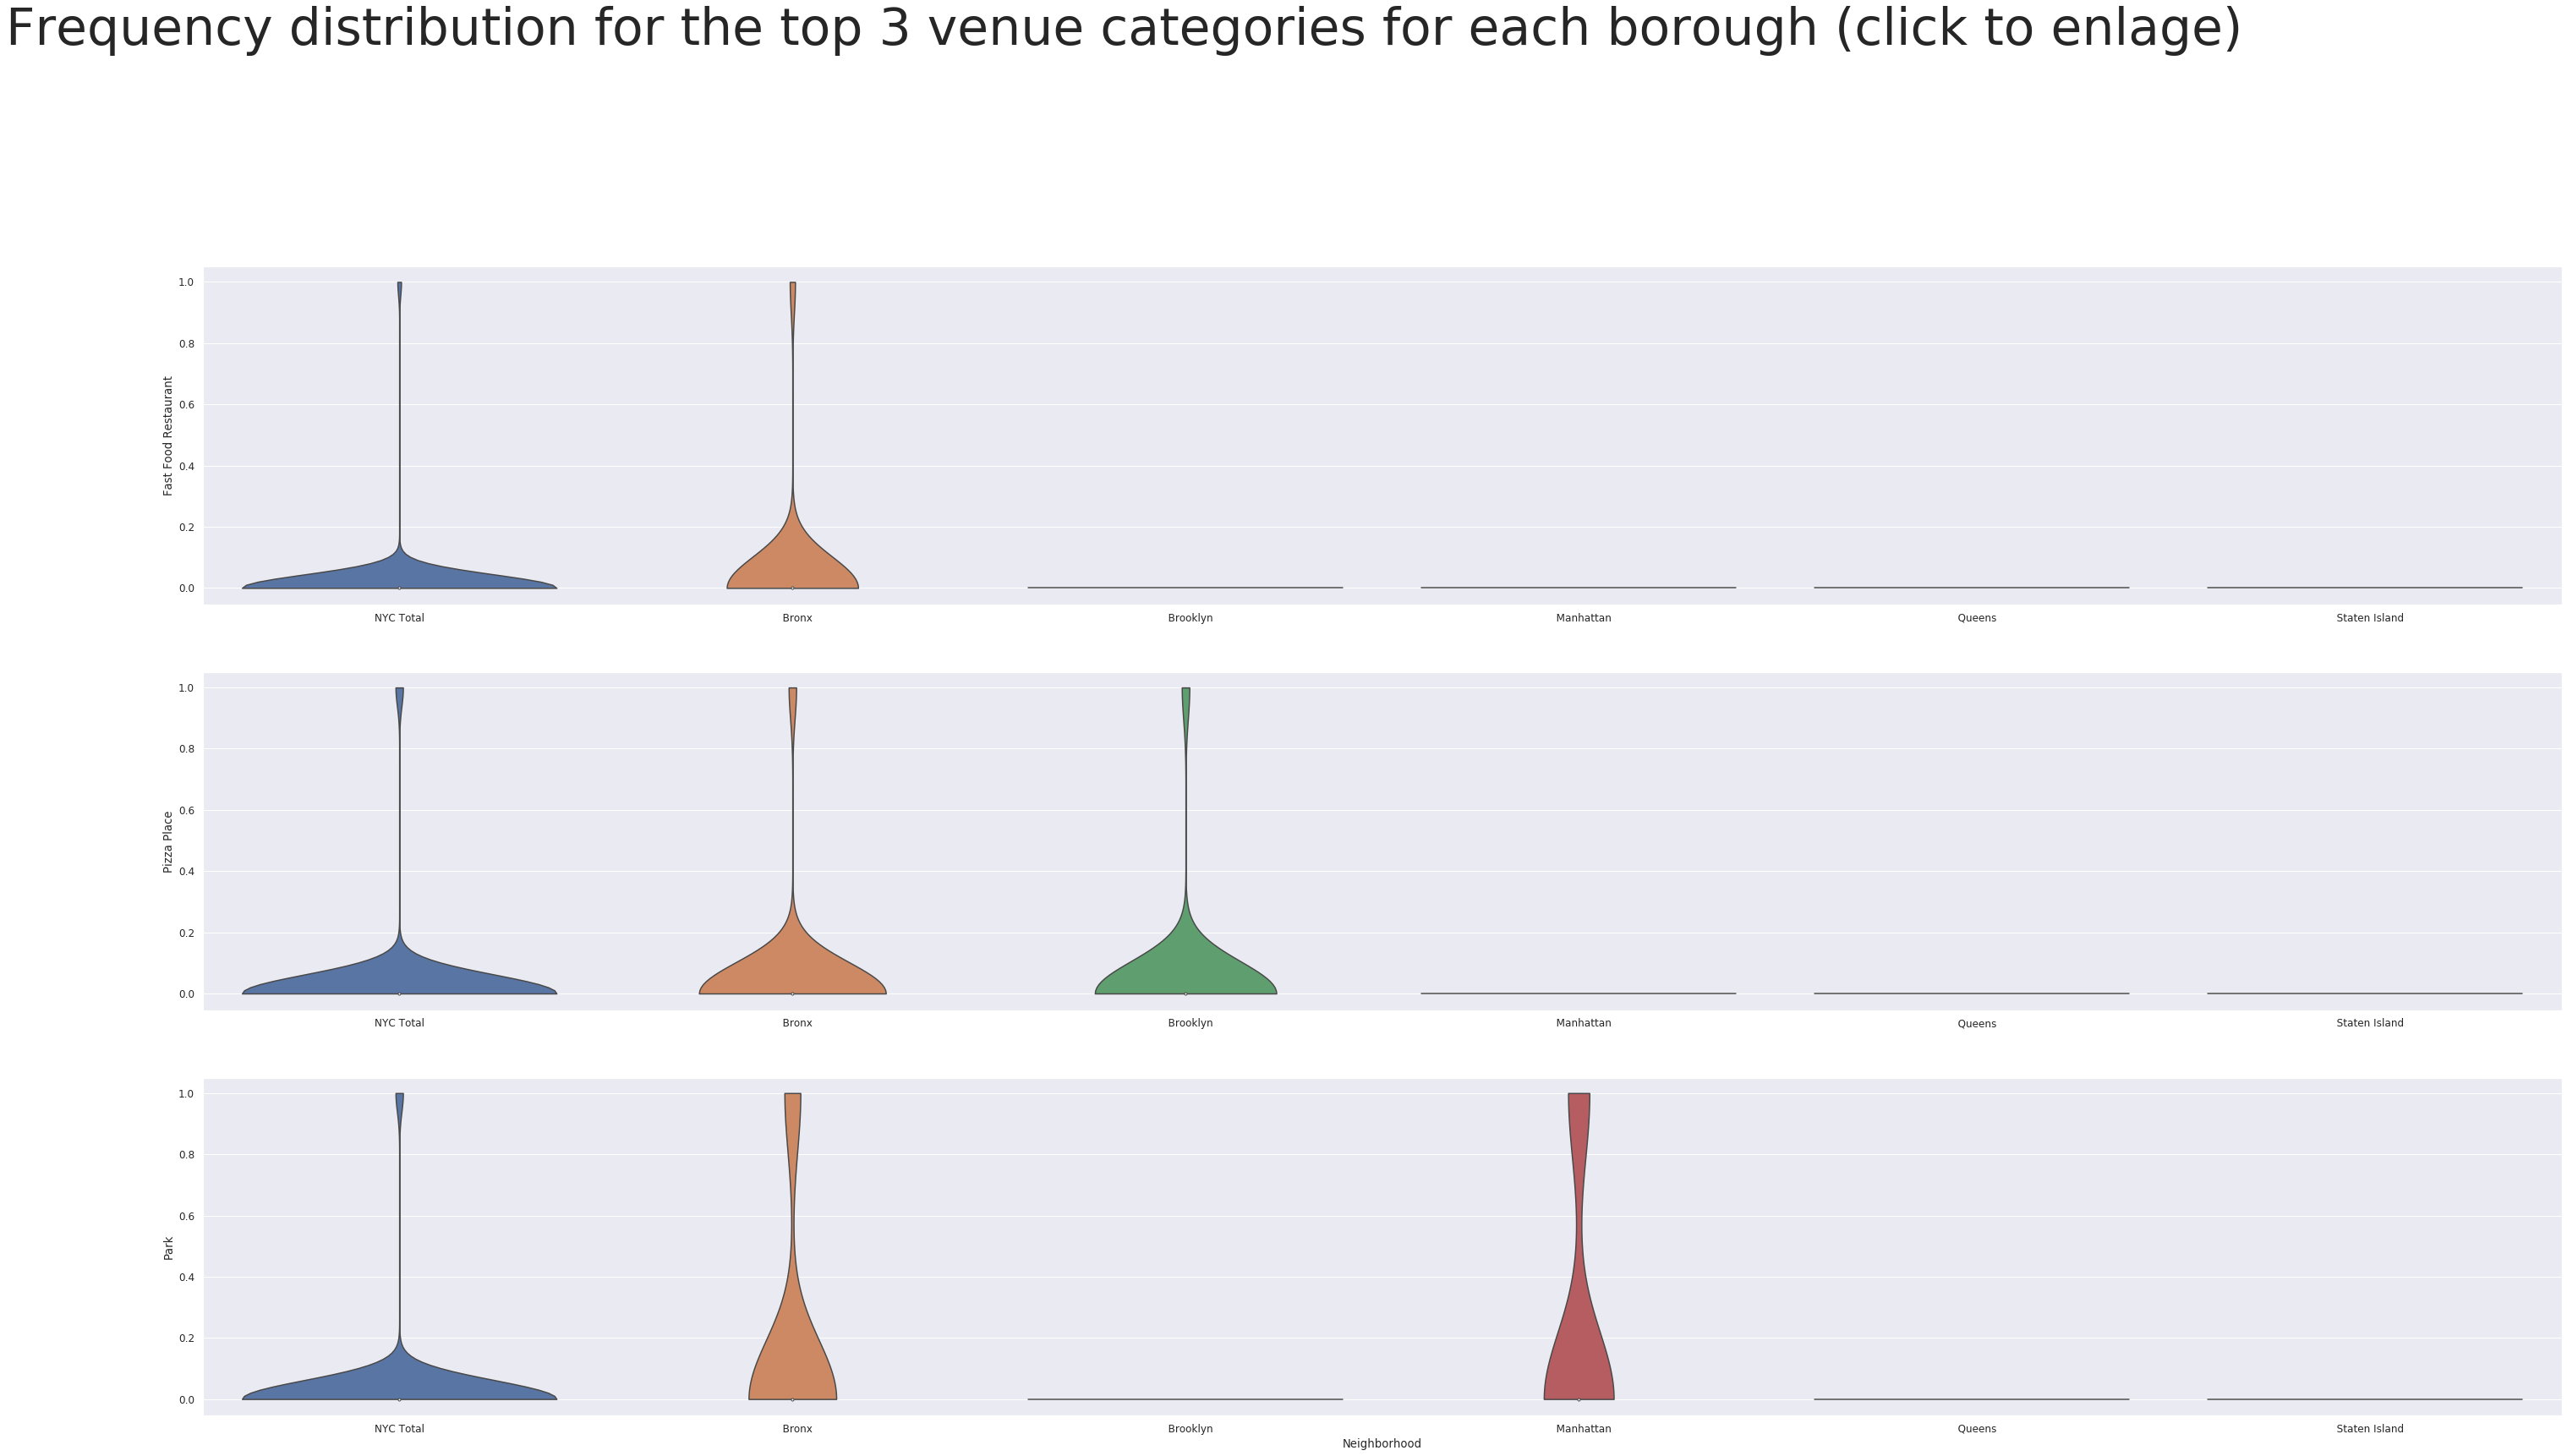

In [58]:
# Categorical plot
# Explore a plot of this data (a violin plot is used which is a density estimation of the underlying distribution).
# The top 3 venue types as specified by the client for each neighborhood are used for the plotting.

import seaborn as sns

fig = plt.figure(figsize=(50,25))
sns.set(font_scale=1.1)

ax = plt.subplot(3,1,1)
sns.violinplot(x="Neighborhood", y="Fast Food Restaurant", data=NYC_onehot, cut=0);
plt.xlabel("")

ax = plt.subplot(3,1,2)
sns.violinplot(x="Neighborhood", y="Pizza Place", data=NYC_onehot, cut=0);
plt.xlabel("")

plt.subplot(3,1,3)
sns.violinplot(x="Neighborhood", y="Park", data=NYC_onehot, cut=0);

ax.text(-1.0, 3.1, 'Frequency distribution for the top 3 venue categories for each borough (click to enlage)', fontsize=60)
plt.savefig ("Distribution_Frequency_Venues_3_categories.png", dpi=240)
plt.show()

### The Boroughs

As we can see from this analysis, New York City is an incredibly diverse place with many different types of venues. It is clear from this analysis that The Bronx and Brooklyn may be the most common places to find fast food joints and pizza places. Next we will add to this analysis to look into Burger Joints.

### Further Analysis - Add venue category "Burger Joint"

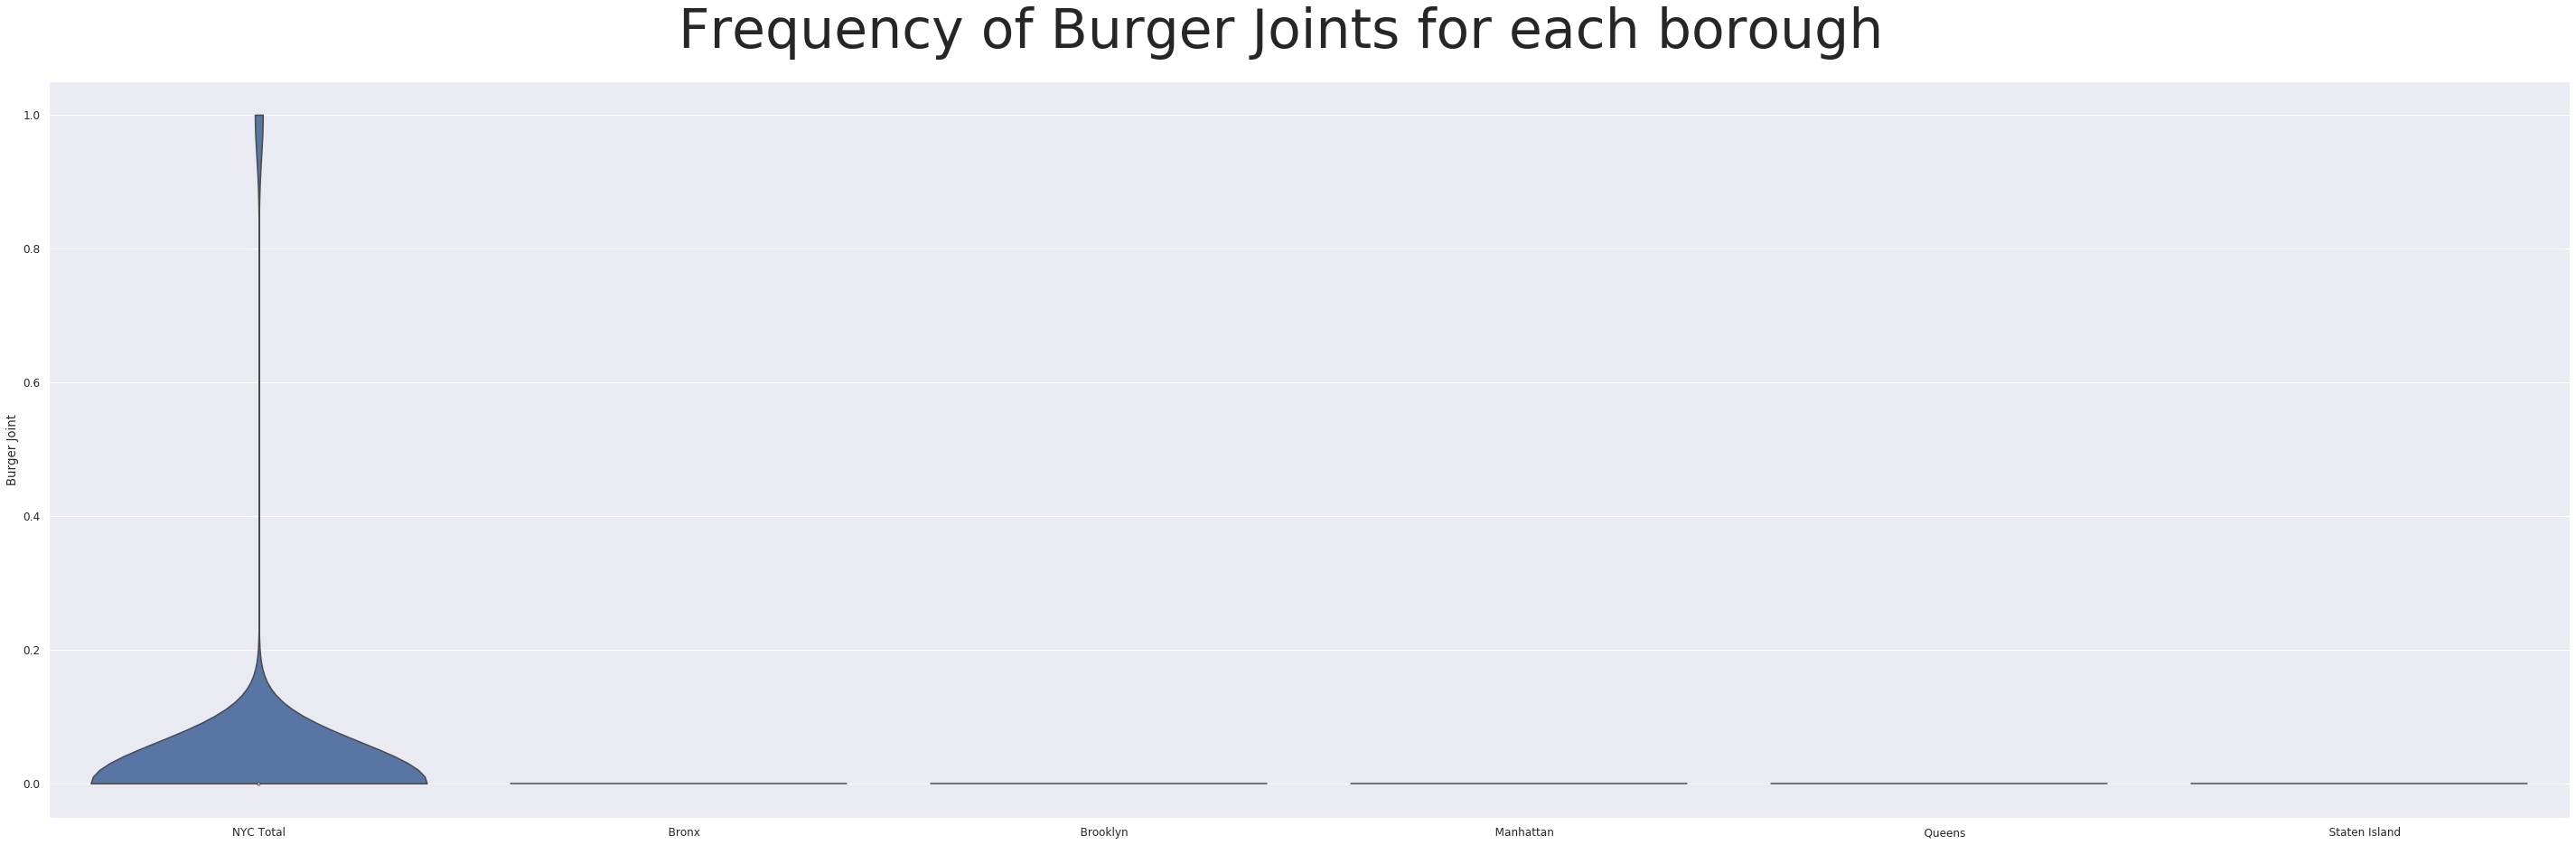

In [57]:
# Add the Burger Joint to explore this category
import seaborn as sns

fig = plt.figure(figsize=(50,15))
sns.set(font_scale=1.1)

ax = plt.subplot(1,1,1)
sns.violinplot(x="Neighborhood", y="Burger Joint", data=NYC_onehot, cut=0);
plt.xlabel("")

ax.text(1.0, 1.1, 'Frequency of Burger Joints for each borough', fontsize=60)
plt.savefig ("Distribution_Burger_Joint_Venues.png", dpi=240)
plt.show()

### Let's combine this analysis with the other 3 specified categories from above

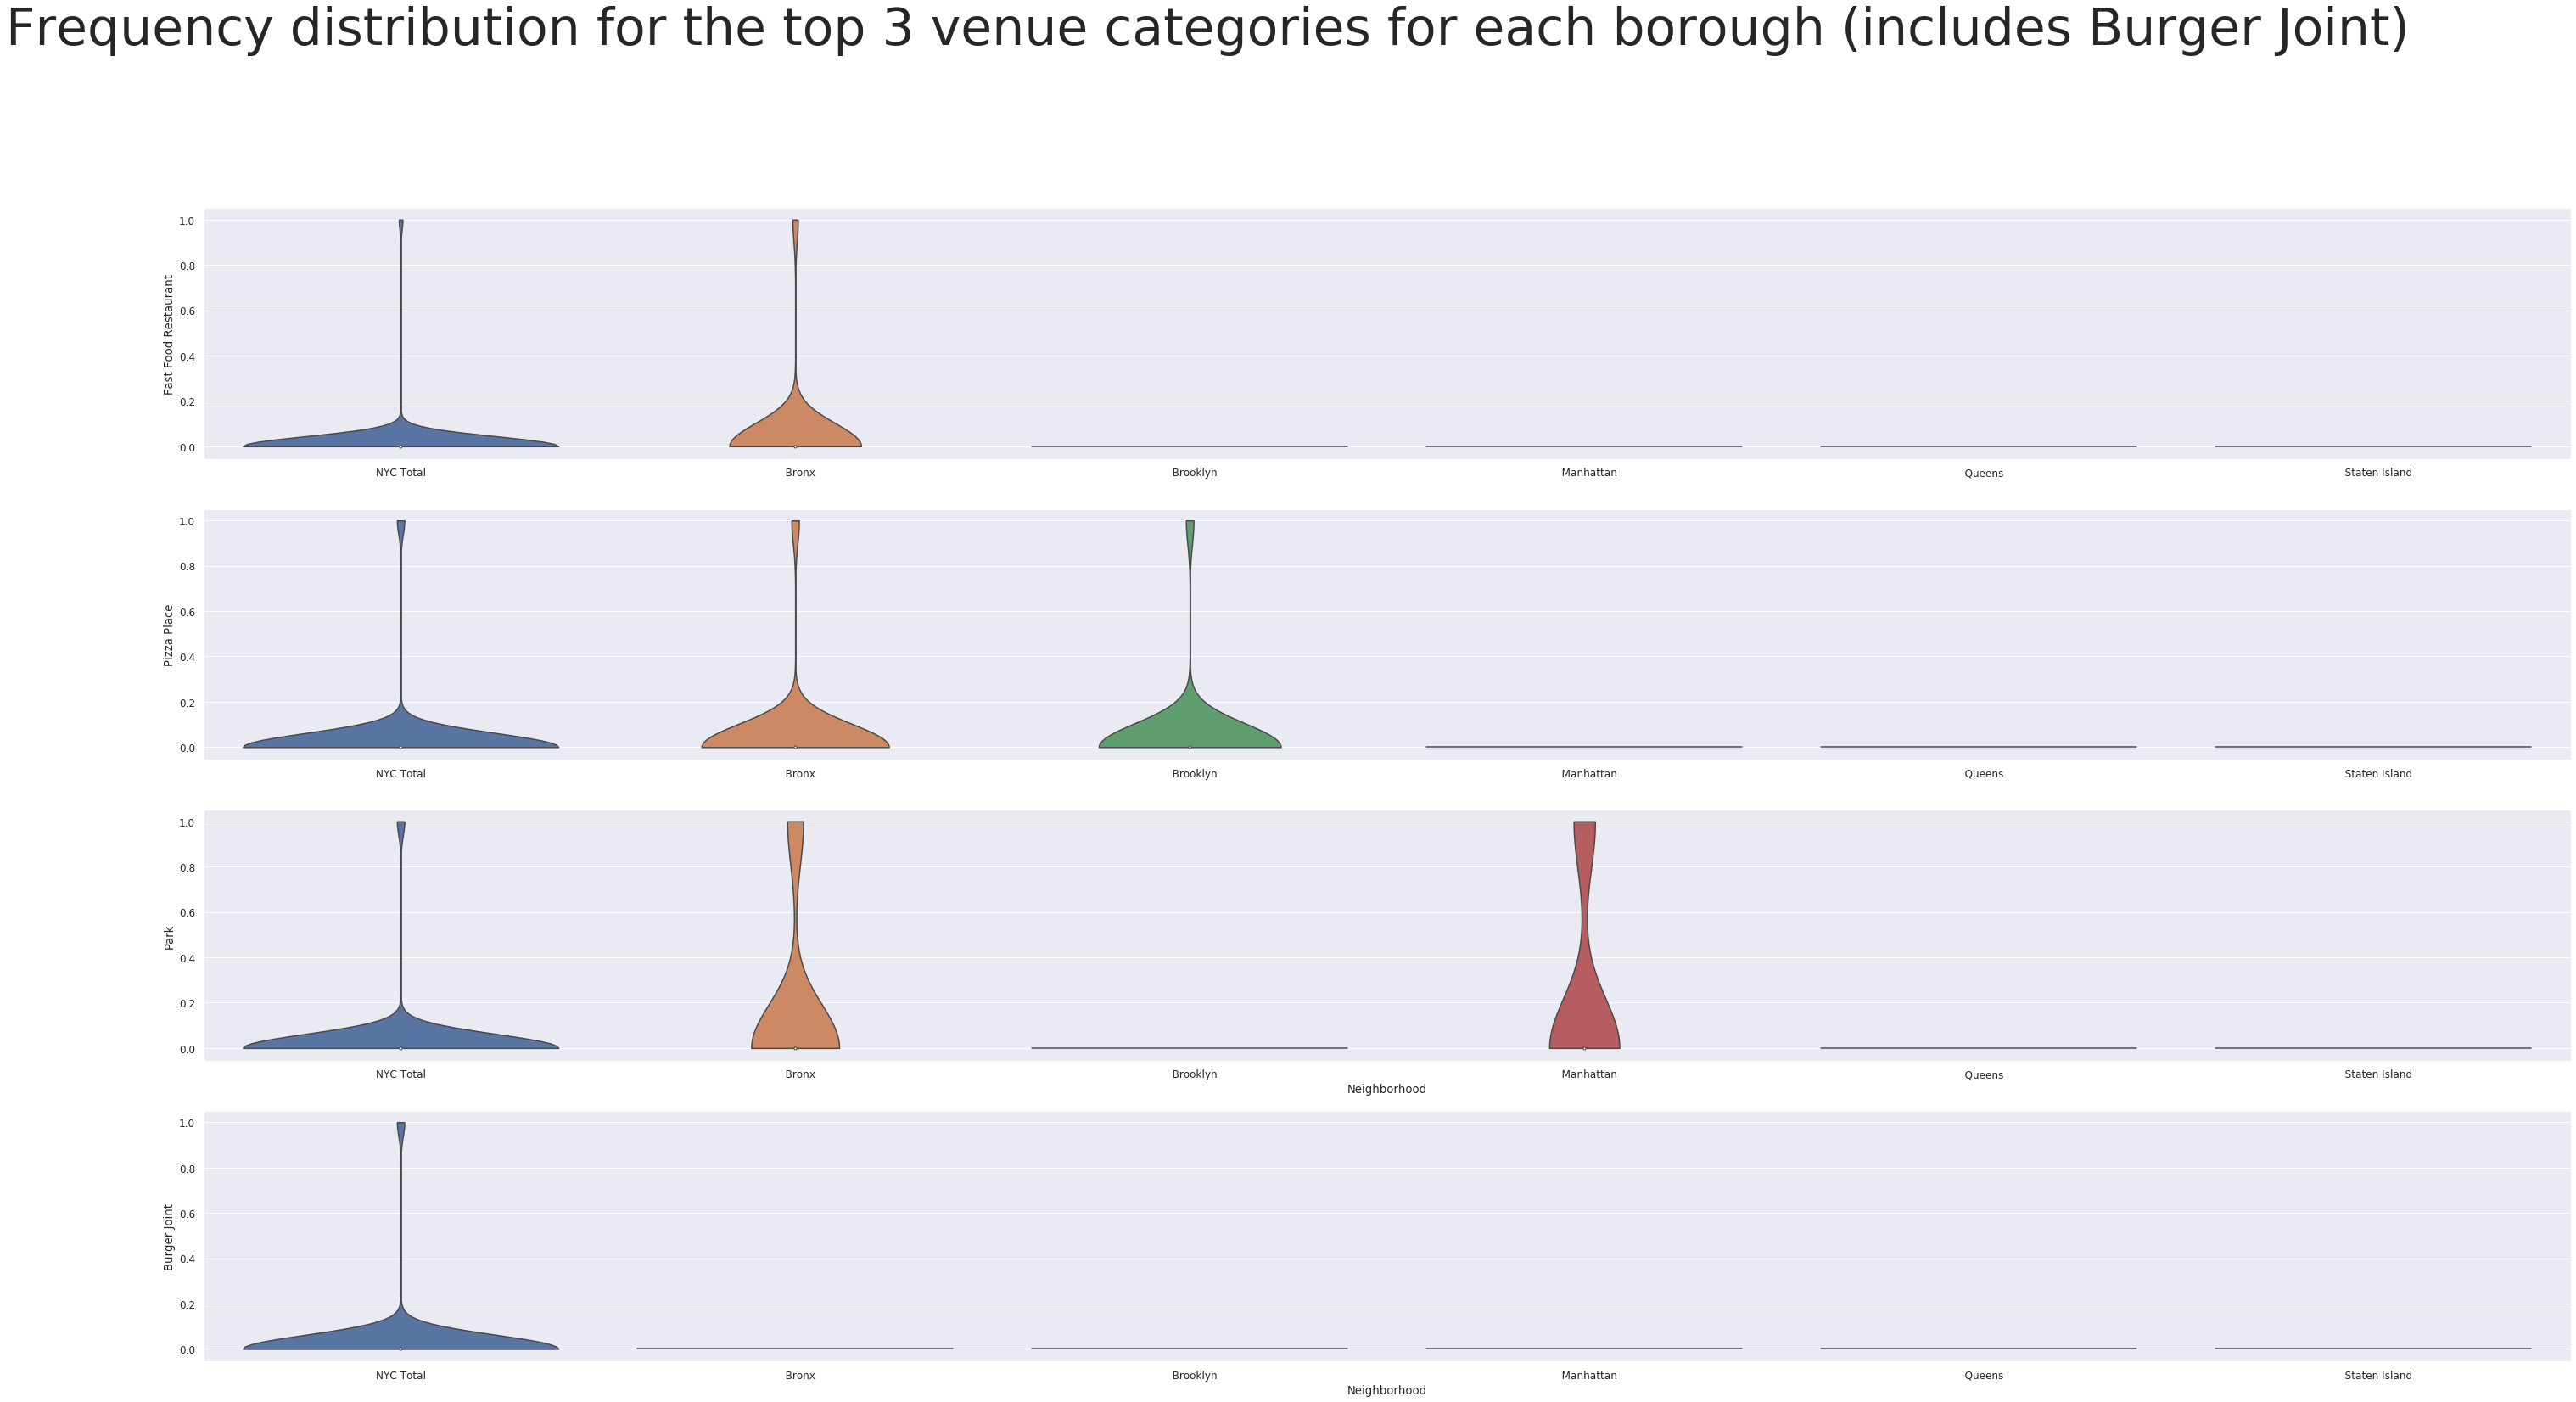

In [59]:
# Clothing_Store has been added to explore this category and make a comparison

import seaborn as sns

fig = plt.figure(figsize=(50,25))
sns.set(font_scale=1.1)

ax = plt.subplot(4,1,1)
sns.violinplot(x="Neighborhood", y="Fast Food Restaurant", data=NYC_onehot, cut=0);
plt.xlabel("")

ax = plt.subplot(4,1,2)
sns.violinplot(x="Neighborhood", y="Pizza Place", data=NYC_onehot, cut=0);
plt.xlabel("")

plt.subplot(4,1,3)
sns.violinplot(x="Neighborhood", y="Park", data=NYC_onehot, cut=0);

plt.subplot(4,1,4)
sns.violinplot(x="Neighborhood", y="Burger Joint", data=NYC_onehot, cut=0);

ax.text(-1.0, 3.1, 'Frequency distribution for the top 3 venue categories for each borough (includes Burger Joint)', fontsize=60)
plt.savefig ("Distribution_Frequency_Venues_3_categories_Burgers.png", dpi=240)
plt.show()

## Inferences and Discussion

### Chosen Boroughs - Results

Based on the results of the inferential analysis, we can see that the Bronx would most likely be the most popular borough to open a burger joint since pizza places and fast food restaurants are already common. However, we can rest assured that regardless of the borough, we will find success in New York City due to the presence of other burger places shown by the "NYC Total" data point. This implies that burger joints have found success in New York city, which further implies that an In-N-Out Burger will also find success.

### Observations

It's not a surprise that another fast food joint would find success in New York City. What is clear from this analysis is that the boroughs of New York City are very large, and manually researching and visiting locations would have been an incredibly time consuming task. With this data, we now have a starting point and we know where to look first.

### Inferences

We have made inferences along the way in this project by determining that the Bronx would be the best fit for an In-N-Out Burger. However, there is no right or wrong answer here. The role of data analysis in this specific project is to steer a course of action for a new In-N-Out location, to meet the criteria of being in boroughs that have other abundant venues, and to narrow the search down to just a few boroughs rather than all five. We have successfully accomplished all of these tasks.

### Conclusions

There are countless numbers of ways that this analysis could have been performed, which is the beauty of data science. Anyone can recreate this project and tweak it to highlight other facts and features. I chose to approach the project in this way because in my opinion it was concise, kept things as simple as possible, and reached an answer that could be supported by the analysis. Keep in mind that these results are not necessarily an end point, but instead a starting point that will allow management to have a head start in finding the perfect location.

Without leveraging data to provide insight into decisions like these, the process would have taken significantly longer. Another benefit of this is that we now use this notebook as a template if we wanted to expand into other new areas. 

Thank you for taking the time to read through this project! Good luck to all on your careers!